In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [25]:
df = pd.read_feather('data/processed.feather')

In [27]:
misspellings = df['misspelled'].values
length = df['word_count']

normalized = misspellings / length
scores = df['domain1_score'].values

In [7]:
def linear(x, a, b): # shape of line to fit | y=a*x+b
	return a * x + b

In [8]:
optimal, covariance = curve_fit(linear, normalized, scores)

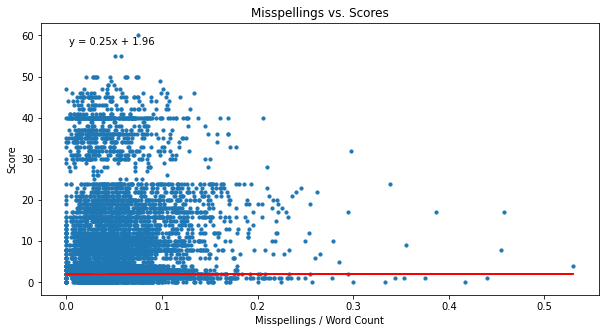

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot the misspellings vs scores
ax.scatter(normalized, scores, s=10, label='data')

# best fit line
ax.plot(normalized, linear(normalized, *optimal), 'r-', label='fit')

# title the graph
ax.set_title('Misspellings vs. Scores')

# add subtitle


# label the axes
ax.set_xlabel('Misspellings / Word Count')
ax.set_ylabel('Score')

# show the equation
ax.text(0.05, 0.95, 'y = {:.2f}x + {:.2f}'.format(*optimal), ha='left', va='top', transform=ax.transAxes)

fig.savefig('plots/misspellings_vs_score.svg')